In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url = "http://bit.ly/w-data"
sample_data = pd.read_csv(url)
print("Data imported sucessfully")

sample_data.head(10)


Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Reading data information
sample_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Describing dataset
sample_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


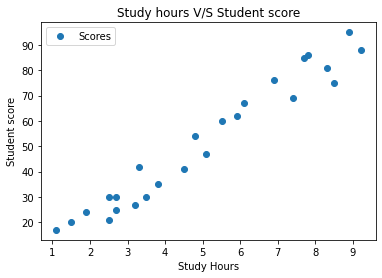

In [5]:
# Plotting scatter plot
sample_data.plot(x='Hours', y='Scores', style='o')
plt.title('Study hours V/S Student score')
plt.xlabel('Study Hours')
plt.ylabel('Student score')
plt.show()


In [6]:
# Dividing the data into "attributes"(inputs) and "labels"(outputs)
X = sample_data.iloc[:, :-1].values  
y = sample_data.iloc[:, 1].values


In [8]:
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [10]:
# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=194)


In [11]:
print("Shape of X train", X_train.shape)
print("Shape of Y train", y_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of Y test", y_test.shape)


Shape of X train (20, 1)
Shape of Y train (20,)
Shape of X test (5, 1)
Shape of Y test (5,)


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
linear_R = LinearRegression()
linear_R.fit(X_train, y_train) 

print("Training is complete.")


Training is complete.


In [14]:
linear_R.coef_


array([9.50658178])

In [15]:
linear_R.intercept_


3.1443947345779932

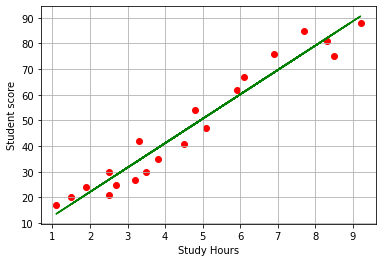

In [16]:
# Plotting regression line.
line = linear_R.coef_*X+linear_R.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X, line, color = 'green');
plt.xlabel('Study Hours')
plt.ylabel('Student score')
plt.grid()
plt.show()


In [17]:
print(X_test) # Testing data - In Hours
y_pred = linear_R.predict(X_test) 

[[7.4]
 [5.5]
 [7.8]
 [2.7]
 [8.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,69,73.493100
1,60,55.430595
2,86,77.295733
3,30,28.812166
4,95,87.752973


In [19]:
# Testing with our own data
hours = 9.25

#Reshaping the data
hours = np.array(hours).reshape(-1,1)
own_pred = linear_R.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 91.0802761765465


In [20]:
from sklearn.metrics import mean_squared_error


print("R^2:{}",format(linear_R.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:{}",format(rmse))


R^2:{} 0.9333481492465858
Root Mean Squared Error:{} 5.8440061880570795
